In [ ]:
!pip install  geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.8 MB/s 
     |████████████████████████████████| 7.8 MB 7.3 MB/s 
     |████████████████████████████████| 16.6 MB 47.7 MB/s 


In [1]:
import tensorflow as tf

In [2]:
print(tf. __version__)

2.9.2


In [4]:
print(py. __version__)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from utils.analysis import (
    calc_score,
    chunk_vs_score,
    evaluate_df,
    plot_chunk_vs_score,
    plot_label_vs_score,
    plot_percdata_vs_score,
    sorted_scores)
from utils.plot import scatter_preds, symmetric_heatmap

In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
merged = gpd.read_file('drive/MyDrive/USP/TCC/data/merged.dbf')
merged.head()

,CD_GEOCODM,state,year,municipali,ranking,IDHM,IncomeIDHM,LongevityI,LiteracyID,area_1,area_2,cell_id,area_joine,percentage,geometry
0,4100103,PR,2010,ABATIA,2251,0.687,0.676,0.804,0.596,228.716959,45.244142,4255,13.986920,0.061154,"POLYGON ((5367323.331 8733675.335, 5367269.465..."
1,4106407,PR,2010,CORNELIO PROCOPIO,383,0.759,0.746,0.848,0.692,635.100146,45.244142,4255,6.015085,0.009471,"MULTIPOLYGON (((5360685.662 8734231.014, 53607..."
2,4117008,PR,2010,NOVA FATIMA,2224,0.688,0.681,0.819,0.584,283.422890,45.244142,4255,0.620037,0.002188,"POLYGON ((5361164.324 8732763.409, 5361243.597..."
3,4121901,PR,2010,RIBEIRAO DO PINHAL,1866,0.701,0.6840000000000001,0.824,0.611,374.732214,45.244142,4255,15.636567,0.041727,"POLYGON ((5362860.876 8732849.614, 5362771.047..."
4,4123105,PR,2010,SANTA AMELIA,3055,0.653,0.655,0.8090000000000001,0.526,78.044652,45.244142,4255,8.985534,0.115133,"POLYGON ((5367106.977 8737519.024, 5366997.515..."


In [ ]:
municipalities = gpd.read_file('drive/MyDrive/USP/TCC/data/municipality.dbf')
municipalities.head()

,CD_GEOCODM,state,year,municipali,ranking,IDHM,IncomeIDHM,LongevityI,LiteracyID,geometry
0,4100103,PR,2010,ABATIA,2251,0.687,0.676,0.804,0.596,"POLYGON ((-50.23401 -23.23786, -50.23391 -23.2..."
1,4100202,PR,2010,ADRIANOPOLIS,2738,0.667,0.644,0.8169999999999999,0.563,"POLYGON ((-48.52848 -24.73929, -48.52786 -24.7..."
2,4100301,PR,2010,AGUDOS DO SUL,2898,0.660,0.671,0.79,0.543,"POLYGON ((-49.35543 -25.95455, -49.35450 -25.9..."
3,4100400,PR,2010,ALMIRANTE TAMANDARE,1934,0.699,0.706,0.84,0.575,"POLYGON ((-49.30055 -25.22737, -49.29821 -25.2..."
4,4100459,PR,2010,ALTAMIRA DO PARANA,2738,0.667,0.667,0.78,0.571,"POLYGON ((-52.80421 -24.82559, -52.79815 -24.8..."


In [ ]:
results = gpd.read_file('drive/MyDrive/USP/TCC/data/training2/idhm/income/income_preds_ooc.csv')
#results['Resnet-18 MS'] = results['Resnet-18 MS'].astype(float)
results.head()

,cell_id,lat,lon,group,year,label,Resnet-18 MS,Resnet-18 MS+NL concat,Resnet-18 NL,Resnet-18 RGB,geometry
0,2916,-26.314129,-51.276913,group10,2010,0.6636302,0.6559328,0.6547191,0.6884977,0.67585474,None
1,2917,-26.252384,-51.277557,group10,2010,0.66822165,0.6522387,0.6521777,0.68688965,0.6741485,None
2,2918,-26.190659,-51.278202,group10,2010,0.6708939,0.6504017,0.6562493,0.6923117,0.6800618,None
3,2919,-26.128948,-51.278847,group10,2010,0.6729167,0.6416334,0.6487088,0.6923242,0.6741564,None
4,2920,-26.067257,-51.27949,group10,2010,0.6350762,0.65885293,0.6602806,0.68688965,0.67787063,None


In [ ]:
res = []
for mun in municipalities['municipali']:
  subset = merged[merged['municipali'] == mun]
  cell_ids = subset['cell_id'].to_numpy()
  cell_ids = cell_ids.astype(str)
  percentage = subset['percentage'].to_numpy()
  incomes_predicted = results[results['cell_id'].isin(cell_ids)]['Resnet-18 MS+NL concat'].to_numpy()
  incomes_predicted = incomes_predicted.astype(float)
  num = 0
  den = 0
  for i in range(len(cell_ids)):
    num += percentage[i] *  incomes_predicted[i]
    den += percentage[i] 
  res.append(num/den)

In [ ]:
municipalities['IncomePredicted'] = res
municipalities 

,CD_GEOCODM,state,year,municipali,ranking,IDHM,IncomeIDHM,LongevityI,LiteracyID,geometry,IncomePredicted
0,4100103,PR,2010,ABATIA,2251,0.687,0.676,0.804,0.596,"POLYGON ((-50.23401 -23.23786, -50.23391 -23.2...",0.700661
1,4100202,PR,2010,ADRIANOPOLIS,2738,0.667,0.644,0.8169999999999999,0.563,"POLYGON ((-48.52848 -24.73929, -48.52786 -24.7...",0.648342
2,4100301,PR,2010,AGUDOS DO SUL,2898,0.660,0.671,0.79,0.543,"POLYGON ((-49.35543 -25.95455, -49.35450 -25.9...",0.681231
3,4100400,PR,2010,ALMIRANTE TAMANDARE,1934,0.699,0.706,0.84,0.575,"POLYGON ((-49.30055 -25.22737, -49.29821 -25.2...",0.732390
4,4100459,PR,2010,ALTAMIRA DO PARANA,2738,0.667,0.667,0.78,0.571,"POLYGON ((-52.80421 -24.82559, -52.79815 -24.8...",0.666502
...,...,...,...,...,...,...,...,...,...,...,...
1039,3557006,SP,2010,VOTORANTIM,265,0.767,0.72,0.838,0.747,"POLYGON ((-47.42417 -23.52376, -47.42382 -23.5...",0.749609
1040,3557105,SP,2010,VOTUPORANGA,67,0.790,0.772,0.857,0.744,"POLYGON ((-50.05318 -20.33614, -50.05207 -20.3...",0.715471
1041,3557154,SP,2010,ZACARIAS,1052,0.729,0.695,0.826,0.674,"POLYGON ((-49.99872 -21.22678, -50.00022 -21.2...",0.714329
1042,3557204,SP,2010,CHAVANTES,1052,0.729,0.713,0.828,0.655,"POLYGON ((-49.67777 -23.00317, -49.67792 -23.0...",0.720134


In [ ]:
municipalities['IncomeIDHM'] = municipalities['IncomeIDHM'].astype(float)

In [ ]:
municipalities.to_csv('drive/MyDrive/USP/TCC/data/IDHMs/modelo2/final_income_performance_by_municipality.csv')

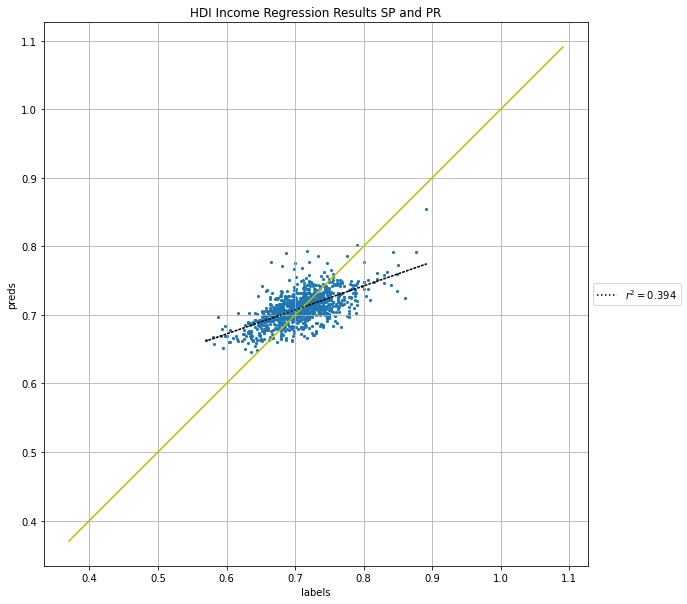

In [ ]:
scatter_preds(
        labels=municipalities['IncomeIDHM'],
        preds=municipalities['IncomePredicted'],
        title='HDI Income Regression Results SP and PR',
        figsize=(10, 10))

In [ ]:
#overall_df = evaluate_df(municipalities, cols=MODEL_NAMES)
#overall_df.sort_values(by='r2', ascending=False, inplace=True)
#display(overall_df)
#overall_df.to_csv('income_performance.csv')

In [ ]:
municipios_VR = ['APIAI',
 'BARRA DO CHAPEU',
 'BARRA DO TURVO',
 'CAJATI',
 'CANANEIA',
 'ELDORADO',
 'IGUAPE',
 'ILHA COMPRIDA',
 'IPORANGA',
 'ITAOCA',
 'ITAPIRAPUA PAULISTA',
 'ITARIRI',
 'JACUPIRANGA',
 'JUQUIA',
 'JUQUITIBA',
 'MIRACATU',
 'PARIQUERA-ACU',
 'PEDRO DE TOLEDO',
 'REGISTRO',
 'RIBEIRA',
 'SAO LOURENCO DA SERRA',
 'SETE BARRAS',
 'TAPIRAI',
 'ADRIANOPOLIS',
 'BOCAIUVA DO SUL',
 'CERRO AZUL',
 'DOUTOR ULYSSES',
 'ITAPERUCU',
 'RIO BRANCO DO SUL',
 'TUNAS DO PARANA']

vr = municipalities[municipalities['municipali'].isin(municipios_VR)]
vr

,CD_GEOCODM,state,year,municipali,ranking,IDHM,IncomeIDHM,LongevityI,LiteracyID,geometry,IncomePredicted
1,4100202,PR,2010,ADRIANOPOLIS,2738,0.667,0.644,0.8169999999999999,0.563,"POLYGON ((-48.52848 -24.73929, -48.52786 -24.7...",0.648342
39,4103107,PR,2010,BOCAIUVA DO SUL,3291,0.640,0.679,0.8159999999999999,0.473,"POLYGON ((-48.82463 -25.03044, -48.82185 -25.0...",0.664637
72,4105201,PR,2010,CERRO AZUL,4786,0.573,0.604,0.797,0.391,"POLYGON ((-49.20883 -24.76341, -49.21062 -24.7...",0.659796
159,4111258,PR,2010,ITAPERUCU,3357,0.637,0.654,0.779,0.507,"POLYGON ((-49.56559 -25.06167, -49.56433 -25.0...",0.673380
308,4122206,PR,2010,RIO BRANCO DO SUL,2462,0.679,0.679,0.847,0.545,"POLYGON ((-49.42926 -24.90435, -49.42817 -24.9...",0.669158
381,4127882,PR,2010,TUNAS DO PARANA,3884,0.611,0.641,0.801,0.444,"POLYGON ((-48.92908 -24.87941, -48.92901 -24.8...",0.654826
395,4128633,PR,2010,DOUTOR ULYSSES,5253,0.546,0.570,0.791,0.362,"POLYGON ((-49.40388 -24.49810, -49.40131 -24.4...",0.662712
428,3502705,SP,2010,APIAI,1595,0.710,0.662,0.835,0.647,"POLYGON ((-48.58338 -24.33791, -48.58020 -24.3...",0.663457
459,3505351,SP,2010,BARRA DO CHAPEU,2898,0.660,0.617,0.779,0.599,"POLYGON ((-48.94978 -24.45320, -48.94908 -24.4...",0.661813
460,3505401,SP,2010,BARRA DO TURVO,3275,0.641,0.625,0.792,0.532,"POLYGON ((-48.52288 -24.68217, -48.52175 -24.6...",0.665010


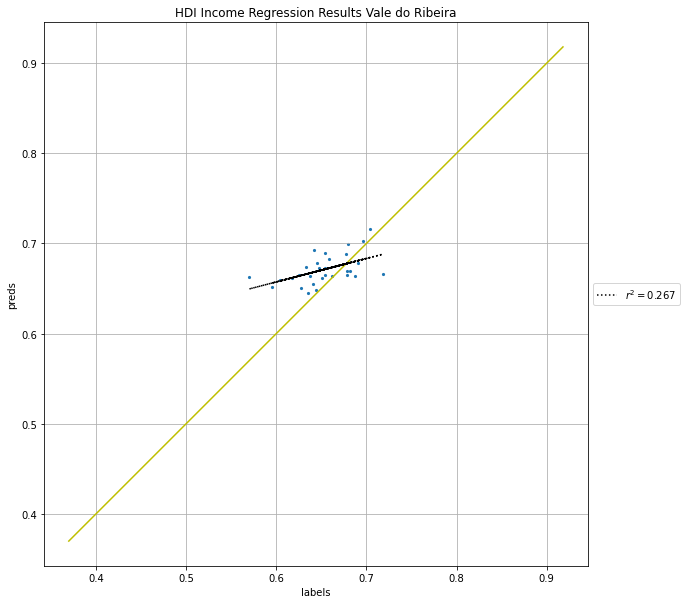

In [ ]:
scatter_preds(
        labels=vr['IncomeIDHM'],
        preds=vr['IncomePredicted'],
        title='HDI Income Regression Results Vale do Ribeira',
        figsize=(10, 10))